In [1]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import s3fs
%matplotlib inline

In [2]:
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))

From the bucket: 

In [3]:
#endpo##int_urls3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(="https://rgw.met.no"))

In [4]:
remote_files = 's3://escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_20*.nc'
remote_files = s3.glob(remote_files)
remote_files

['escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_200001-200912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_201001-201912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_202001-202912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_203001-203912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_204001-204912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_205001-205912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_206001-206912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_207001-207112.nc']

In [5]:
remote_files = 's3://escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_20*.nc'
remote_files = s3.glob(remote_files)
remote_files

['escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_200001-200912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_201001-201912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_202001-202912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_203001-203912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_204001-204912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_205001-205912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_206001-206912.nc',
 'escience2022/Ada/monthly/tos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_207001-207112.nc']

In [6]:
fileset = [s3.open(file) for file in remote_files]
ds = xr.open_mfdataset(fileset, combine='by_coords')
ds

<xarray.Dataset>
Dimensions:             (time: 864, bnds: 2, j: 385, i: 360, vertices: 4)
Coordinates:
  * time                (time) object 2000-01-16 12:00:00 ... 2071-12-16 12:0...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384 385
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    latitude            (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    vertices_latitude   (time, j, i, vertices) float64 dask.array<chunksize=(120, 385, 360, 4), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float64 dask.array<chunksize=(120, 385, 360, 4), meta=np.ndarray>
    tos                 (time, j, i) float32 dask.array<chunksize=(120, 385, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               OMIP
    branch_method:             no parent
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     0.0
    ...                        ...
    title:                     NorESM2-LM output prepared for CMIP6
    variable_id:               tos
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/d143b3bb-9d9d-48cc-bb96-bc0bd6b5a9a8

In [7]:
ds_m=ds.groupby(ds['time.year']).mean('time')
ds_m

<xarray.Dataset>
Dimensions:             (year: 72, j: 385, i: 360, vertices: 4)
Coordinates:
  * j                   (j) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384 385
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    longitude           (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    latitude            (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
  * year                (year) int64 2000 2001 2002 2003 ... 2068 2069 2070 2071
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (year, j, i, vertices) float64 dask.array<chunksize=(1, 385, 360, 4), meta=np.ndarray>
    vertices_longitude  (year, j, i, vertices) float64 dask.array<chunksize=(1, 385, 360, 4), meta=np.ndarray>
    tos                 (year, j, i) float32 dask.array<chunksize=(1, 385, 360), meta=np.ndarray>

In [8]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(source_id=['NorESM2-LM'], activity_id = ['CMIP'], experiment_id=['piControl'], table_id=['Ofx'], variable_id=['areacello'], member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCC,NorESM2-LM,piControl,r1i1p1f1,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/piControl...,NaN,20210118


In [9]:
ds_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [10]:
areacello = ds_dict[list(ds_dict.keys())[0]]

In [40]:
areacello = areacello.squeeze()
#areacello

In [31]:
ds_m=ds.groupby(ds['time.month']).mean('time')

In [39]:
#BSarea = areacello.areacello.where((areacello.latitude>=65.9) & (areacello.latitude<=0) #& (areacello.longitude <= 71)  #& (areacello.longitude >= 16.6))
BSarea = areacello.areacello.where(areacello.latitude>66)
#BSarea.plot.contourf()

## Sea ice data from 2000 to 2020:

In [105]:
#R_fSI='s3://escience2022/Ada/monthly/siconc_SImon_NorESM2-LM_omip1_r1i1p1f1_gn_20*.nc'
R_fSI='s3://escience2022/Ada/monthly/siconc_SImon_NorESM2-LM_omip1_r1i1p1f1_gn_20*.nc'
R_fSI=s3.glob(R_fSI)

R_fSIi='s3://escience2022/Ada/monthly/siconc_SImon_NorESM2-LM_omip1_r1i1p1f1_gn_19*.nc'
R_fSIi=s3.glob(R_fSIi)

In [110]:
fileset = [s3.open(file) for file in R_fSI]
dSI = xr.open_mfdataset(fileset, combine='by_coords')

fileset = [s3.open(file) for file in R_fSIi]
dSIi = xr.open_mfdataset(fileset, combine='by_coords')


<xarray.Dataset>
Dimensions:             (time: 864, bnds: 2, j: 384, i: 360, vertices: 4)
Coordinates:
  * time                (time) object 2000-01-16 12:00:00 ... 2071-12-16 12:0...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 378 379 380 381 382 383 384
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    latitude            (j, i) float64 dask.array<chunksize=(384, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(384, 360), meta=np.ndarray>
    type                |S7 b'sea_ice'
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    vertices_latitude   (time, j, i, vertices) float64 dask.array<chunksize=(120, 384, 360, 4), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float64 dask.array<chunksize=(120, 384, 360, 4), meta=np.ndarray>
    siconc              (time, j, i) float32 dask.array<chunksize=(120, 384, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               OMIP
    branch_method:             no parent
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     0.0
    ...                        ...
    title:                     NorESM2-LM output prepared for CMIP6
    variable_id:               siconc
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/3406043a-cabb-406c-93e9-6ec12330c992

In [17]:
month_length = dSI.time.dt.days_in_month
weights = month_length.groupby("time.month") / month_length.groupby("time.month").sum()
# Test that the sum of the weights for each year is 1.0
np.testing.assert_allclose(weights.groupby("time.month").sum().values, np.ones(len(np.unique(dSI.time.dt.month))))
# Calculate the weighted average:
da = (dSI.siconc * weights).groupby("time.month").sum(dim="time")

In [18]:
#First 20 years of the dataset 
da = da.isel(month = slice(0,241))

In [19]:
BSsI=da.where((da.latitude>66))

In [20]:
BSsI = (BSarea*BSsI).sum(dim=('i','j'))/BSarea.sum(dim=('i', 'j'))
#BSsI.plot(x='month',color='r')

## Seaice conc from 1900to 1920 :

In [21]:
#Reading the data 
R_fSIi='s3://escience2022/Ada/monthly/siconc_SImon_NorESM2-LM_omip1_r1i1p1f1_gn_19*.nc'
R_fSIi=s3.glob(R_fSIi)

In [22]:
fileset = [s3.open(file) for file in R_fSIi]
dSIi = xr.open_mfdataset(fileset, combine='by_coords')

In [24]:
#Weighing the data:
month_length = dSIi.time.dt.days_in_month
weights = month_length.groupby("time.month") / month_length.groupby("time.month").sum()
# Test that the sum of the weights for each year is 1.0
np.testing.assert_allclose(weights.groupby("time.month").sum().values, np.ones(len(np.unique(dSIi.time.dt.month))))
# Calculate the weighted average:
dai = (dSIi.siconc * weights).groupby("time.month").sum(dim="time")


In [25]:
#First 20 years of the data set  
dai = dai.isel(month = slice(0,241))

In [26]:
BSsIi = dai.where((dai.latitude>66))
BSsIi = (BSarea*BSsIi).sum(dim=('i','j'))/BSarea.sum(dim=('i','j'))
#BSsIi.plot(x='month',color='b')

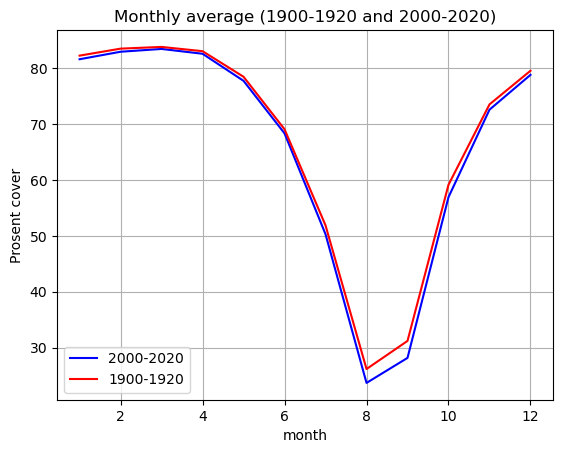

In [27]:
#Plotting sea ice consentration from the early 1900s and early 2000 
BSsI.plot(x='month', color='b',label='2000-2020' ) #2000 plot 
BSsIi.plot(x='month', color='r',label='1900-1920' ) #1900 plot 
plt.title('Monthly average (1900-1920 and 2000-2020)')
plt.ylabel('Prosent cover')
plt.grid()
plt.legend()

In [41]:
#BSsIi = dai.where((dai.latitude>66))
#BSsIi.mean(dim='month').plot.contourf()

In [ ]:
#BSsI = dai.where((dai.latitude>66))
#BSsI.mean(dim='month').plot.contourf()

## Phytoplankton data 1900- 1920:

In [76]:
#Reading phytoplankton data: 
R_ch19='s3://escience2022/Ada/monthly/chlos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_19*.nc'
R_ch19=s3.glob(R_ch19)

In [77]:
fileset = [s3.open(file) for file in R_ch19]
dch19 = xr.open_mfdataset(fileset, combine='by_coords')


#Weighing the data:
month_length = dch19.time.dt.days_in_month
weights = month_length.groupby("time.month") / month_length.groupby("time.month").sum()
# Test that the sum of the weights for each year is 1.0
np.testing.assert_allclose(weights.groupby("time.month").sum().values, np.ones(len(np.unique(dch19.time.dt.month))))
# Calculate the weighted average:
dach19 = (dch19.chlos * weights).groupby("time.month").sum(dim="time")

In [78]:
#Slicing the data into 
dach19 = dach19.isel(month = slice(0,183))

In [79]:
Ach19=dach19.where((dach19.latitude>66)) 
Ach19 = (BSarea*Ach19).sum(dim=('i','j'))/BSarea.sum(dim=('i', 'j'))

 ## Phytoplankton 2000-2020: 

In [80]:
R_ch20='s3://escience2022/Ada/monthly/chlos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_20*.nc'
R_ch20=s3.glob(R_ch20)
R_ch20

['escience2022/Ada/monthly/chlos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_200001-200912.nc']

In [81]:
fileset = [s3.open(file) for file in R_ch20]
dch20 = xr.open_mfdataset(fileset, combine='by_coords')

In [82]:
month_length = dch20.time.dt.days_in_month
weights = month_length.groupby("time.month") / month_length.groupby("time.month").sum()
# Test that the sum of the weights for each year is 1.0
np.testing.assert_allclose(weights.groupby("time.month").sum().values, np.ones(len(np.unique(dch20
                                                                                             .time.dt.month))))
# Calculate the weighted average:
dach20 = (dch20.chlos * weights).groupby("time.month").sum(dim="time")

#Slicing the data: 
dach20 = dach20.isel(month = slice(0,183))

In [83]:
Ach20=dach20.where((dach20.latitude>66)) 
Ach20 = (BSarea*Ach20).sum(dim=('i','j'))/BSarea.sum(dim=('i', 'j'))
#Ach20.plot(x='month',color='r')

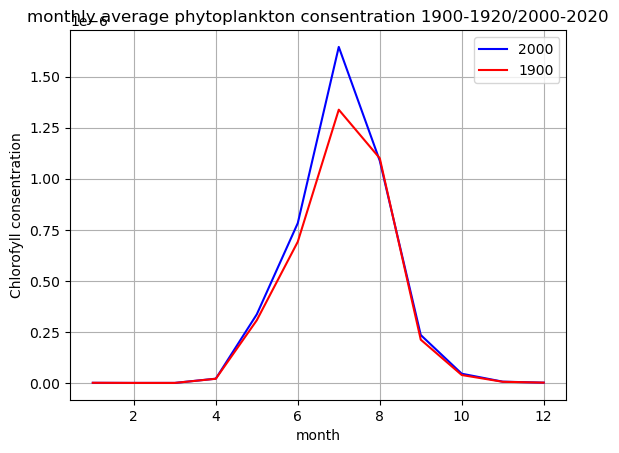

In [85]:
Ach20.plot(x='month', color='b', label='2000') 
Ach19.plot(x='month', color='r', label='1900') 
plt.title('monthly average phytoplankton consentration 1900-1920/2000-2020')
plt.ylabel('Chlorofyll consentration') 
plt.grid()
plt.legend()

Radiation data: 

In [42]:
R_r19='s3://escience2022/Ada/monthly/rsntds_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_19*.nc'
R_r19=s3.glob(R_r19)

In [89]:
fileset = [s3.open(file) for file in R_r19]
r19 = xr.open_mfdataset(fileset, combine='by_coords')

In [44]:
month_length = r19.time.dt.days_in_month
weights = month_length.groupby("time.month") / month_length.groupby("time.month").sum()
# Test that the sum of the weights for each year is 1.0
np.testing.assert_allclose(weights.groupby("time.month").sum().values, np.ones(len(np.unique(r19
                                                                                             .time.dt.month))))
# Calculate the weighted average:
dr19 = (r19.rsntds * weights).groupby("time.month").sum(dim="time")

#Slicing the data: 
dr19 = dr19.isel(month = slice(0,183))


In [45]:
Ar19=dr19.where((dr19.latitude>71)) 
Ar19 = (BSarea*dr19).sum(dim=('i','j'))/BSarea.sum(dim=('i', 'j'))
#Ar19.plot(x='month',color='r')
#plt.ylabel('W m-2')

In [46]:
R_r20='s3://escience2022/Ada/monthly/rsntds_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_20*.nc'
R_r20=s3.glob(R_r20)

fileset = [s3.open(file) for file in R_r20]
r20= xr.open_mfdataset(fileset, combine='by_coords')

In [47]:
month_length = r20.time.dt.days_in_month
weights = month_length.groupby("time.month") / month_length.groupby("time.month").sum()
# Test that the sum of the weights for each year is 1.0
np.testing.assert_allclose(weights.groupby("time.month").sum().values, np.ones(len(np.unique(r20
                                                                                             .time.dt.month))))
# Calculate the weighted average:
dr20 = (r20.rsntds * weights).groupby("time.month").sum(dim="time")

#Slicing the data: 
dr20 = dr20.isel(month = slice(0,183))

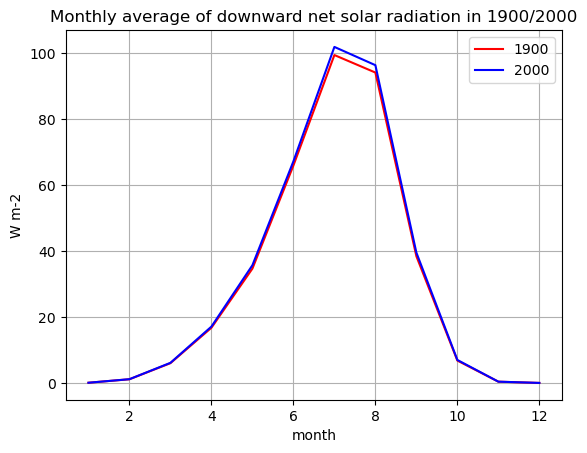

In [48]:
Ar20=dr20.where((dr20.latitude>71)) 
Ar20 = (BSarea*dr20).sum(dim=('i','j'))/BSarea.sum(dim=('i', 'j'))
Ar19.plot(x='month',color='r', label='1900')
Ar20.plot(x='month', color='b', label='2000') 
plt.title('Monthly average of downward net solar radiation in 1900/2000') 
plt.ylabel('W m-2')
plt.grid()
plt.legend()

## Zooplankton data 1900-1920/ 2000-2020: 

In [54]:
R_z19='s3://escience2022/Ada/monthly/zoocos_Omon_NorESM2-LM_omip1_r1i1p1f1_gr_19*.nc'
R_z19=s3.glob(R_z19)

R_z20='s3://escience2022/Ada/monthly/zoocos_Omon_NorESM2-LM_omip1_r1i1p1f1_gr_20*.nc'
R_z20=s3.glob(R_z20)

In [88]:
fileset = [s3.open(file) for file in R_z19]
z19 = xr.open_mfdataset(fileset, combine='by_coords')

fileset = [s3.open(file) for file in R_z20]
z20 = xr.open_mfdataset(fileset, combine='by_coords')

In [94]:
#1900

month_length = z19.time.dt.days_in_month
weights = month_length.groupby("time.month") / month_length.groupby("time.month").sum()
# Test that the sum of the weights for each year is 1.0
np.testing.assert_allclose(weights.groupby("time.month").sum().values, np.ones(len(np.unique(z19
                                                                                             .time.dt.month))))
# Calculate the weighted average:
dz19 = (z19.zoocos * weights).groupby("time.month").sum(dim="time")

#Slicing the data: 
dz19 = dz19.isel(month = slice(0,183))

# 2000
month_length = z20.time.dt.days_in_month
weights = month_length.groupby("time.month") / month_length.groupby("time.month").sum()
# Test that the sum of the weights for each year is 1.0
np.testing.assert_allclose(weights.groupby("time.month").sum().values, np.ones(len(np.unique(z20
                                                                                           .time.dt.month))))
# Calculate the weighted average:
dz20 = (z20.zoocos * weights).groupby("time.month").sum(dim="time")

#Slicing the data: 
dz20 = dz20.isel(month = slice(0,183))

#test


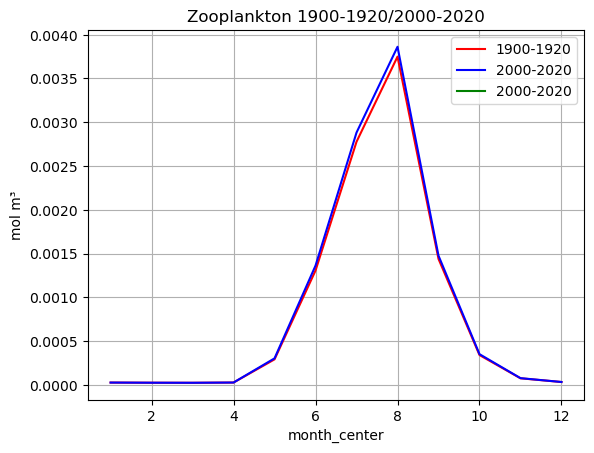

In [95]:
Zd19=dz19.where((dz19.latitude>66)) 
Zd20=dz20.where((dz20.latitude>66))
Zd21=dz21.where((dz21.latitude>66))
Zd21 = (BSarea*dz21).sum(dim=('i','j'))/BSarea.sum(dim=('i', 'j'))
Zd19 = (BSarea*dz19).sum(dim=('i','j'))/BSarea.sum(dim=('i', 'j'))
Zd20 = (BSarea*dz20).sum(dim=('i','j'))/BSarea.sum(dim=('i', 'j'))
Zd19.plot(x='month',color='r', label='1900-1920')
Zd20.plot(x='month', color='b', label='2000-2020') 
Zd21.plot(x='month', color='g', label='2000-2020') 
#itle('Zooplankton 1900-1920/2000-2020') 
plt.ylabel('mol m³')
plt.grid()
plt.legend()